In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cliente = pd.read_excel('./Datos_RFM_ClienteFinal.xlsx')
df_distribuidor = pd.read_excel('./Datos_RFM_Distribuidor.xlsx')

print(df_cliente.head())
df_distribuidor.head()

   Unnamed: 0  CLIENTE_ID       ULTIMA_COMPRA REFERENCIA  RECENCIA_DIAS  \
0           0       12346 2010-06-28 13:53:00 2010-12-31            185   
1           1       12347 2010-12-07 14:57:00 2010-12-31             23   
2           2       12348 2010-12-16 19:09:00 2010-12-31             14   
3           3       12349 2010-10-28 08:23:00 2010-12-31             63   
4           4       12351 2010-11-29 15:23:00 2010-12-31             31   

   IMPORTE_VENTA  FRECUENCIA  IMPORTE_LOG  
0          51.48          28     3.941193  
1        1341.99         102     7.201909  
2        1903.59          37     7.551497  
3        1161.81         102     7.057734  
4         305.37          21     5.721524  


,Unnamed: 0,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG
0,9,12357,2010-11-16 14:29:00,2010-12-31,44,4538.43,165,8.420336
1,44,12409,2010-10-15 10:24:00,2010-12-31,76,8882.64,155,9.091854
2,50,12415,2010-11-29 15:07:00,2010-12-31,31,16465.41,212,9.709017
3,64,12433,2010-12-08 16:49:00,2010-12-31,22,11263.59,433,9.329331
4,67,12437,2010-11-09 14:46:00,2010-12-31,51,5633.55,337,8.636495


In [3]:
df_cliente.describe()

,Unnamed: 0,CLIENTE_ID,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG
count,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000
mean,2131.851747,15366.836588,104.285714,653.496405,68.927801,5.894540
std,1219.532771,1700.431572,89.452135,656.361126,85.134499,1.269430
min,0.000000,12346.000000,7.000000,1.170000,1.000000,0.157004
25%,1074.750000,13897.750000,37.000000,170.820000,17.000000,5.140610
50%,2141.500000,15374.500000,71.500000,399.555000,40.000000,5.990350
75%,3190.250000,16856.250000,148.000000,918.742500,87.000000,6.823006
max,4232.000000,18287.000000,359.000000,2979.990000,796.000000,7.999675


In [4]:
df_distribuidor.describe()

,Unnamed: 0,CLIENTE_ID,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,1935.076246,15091.354839,38.967742,11245.209677,395.387097,8.745136
std,1238.602949,1728.547256,44.886872,23943.341192,571.283552,0.825443
min,9.000000,12357.000000,7.000000,2985.840000,2.000000,8.001636
25%,870.000000,13615.000000,15.000000,3608.280000,139.000000,8.190986
50%,1850.000000,14961.000000,23.000000,4725.630000,249.000000,8.460756
75%,2984.000000,16553.000000,44.000000,7778.160000,432.000000,8.959075
max,4210.000000,18260.000000,310.000000,257992.020000,5610.000000,12.460684


In [5]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     3892 non-null   int64         
 1   CLIENTE_ID     3892 non-null   int64         
 2   ULTIMA_COMPRA  3892 non-null   datetime64[ns]
 3   REFERENCIA     3892 non-null   datetime64[ns]
 4   RECENCIA_DIAS  3892 non-null   int64         
 5   IMPORTE_VENTA  3892 non-null   float64       
 6   FRECUENCIA     3892 non-null   int64         
 7   IMPORTE_LOG    3892 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4)
memory usage: 243.4 KB


In [6]:
customer_segmentation = {
     '555': 'TOP',
     '255': 'Ballena en riesgo',
     '254': 'Bueno en riesgo',
     '253': 'Bueno en riesgo',
     '252': 'Bueno en riesgo',
     '245': 'Ballena en riesgo',
     '244': 'Bueno en riesgo',
     '243': 'Bueno en riesgo',
     '242': 'Bueno en riesgo',
     '155': 'Bueno durmiente',
     '154': 'Bueno durmiente',
     '145': 'Ballena durmiente',
     '144': 'Bueno durmiente',
     '552': 'Fiel',
     '551': 'Fiel',
     '542': 'Fiel',
     '541': 'Fiel',
     '452': 'Fiel',
     '451': 'Fiel',
     '442': 'Fiel',
     '441': 'Fiel',
     '352': 'Fiel',
     '351': 'Fiel',
     '342': 'Fiel',
     '341': 'Fiel',
     '153': 'Fiel durmiente',
     '152': 'Fiel durmiente',
     '151': 'Fiel durmiente',
     '143': 'Fiel durmiente',
     '142': 'Fiel durmiente',
     '141': 'Fiel durmiente',
     '554': 'Fiel bueno',
     '553': 'Fiel bueno',
     '545': 'Ballena fiel',
     '544': 'Fiel bueno',
     '543': 'Fiel bueno',
     '455': 'Ballena fiel',
     '454': 'Fiel bueno',
     '453': 'Fiel bueno',
     '445': 'Ballena fiel',
     '444': 'Fiel bueno',
     '443': 'Fiel bueno',
     '355': 'Ballena fiel',
     '354': 'Fiel bueno',
     '353': 'Fiel bueno',
     '345': 'Ballena fiel',
     '344': 'Fiel bueno',
     '343': 'Fiel bueno',
     '315': 'Ballena casi durmiente',
     '314': 'Casi durmiente',
     '313': 'Casi durmiente',
     '312': 'Casi durmiente',
     '311': 'Casi durmiente',
     '215': 'Ballena casi durmiente',
     '214': 'Casi durmiente',
     '213': 'Casi durmiente',
     '212': 'Casi durmiente',
     '211': 'Casi durmiente',
     '115': 'Ballena durmiente',
     '114': 'Durmiente',
     '113': 'Durmiente',
     '112': 'Durmiente',
     '111': 'Caso Perdido',
     '515': 'Potencial ballena',
     '514': 'Nuevo',
     '513': 'Nuevo',
     '512': 'Nuevo',
     '511': 'Nuevo',
     '415': 'Potencial ballena',
     '414': 'Nuevo',
     '413': 'Nuevo',
     '412': 'Nuevo',
     '411': 'Potencial'}

In [7]:
df_cliente['QUINTIL_FRECUENCIA'] = pd.qcut(df_cliente['FRECUENCIA'], 5, labels = [1,2,3,4,5])

In [8]:
df_cliente['QUINTIL_IMPVENTA'] = pd.qcut(df_cliente['IMPORTE_VENTA'], 5, labels = [1,2,3,4,5])

In [9]:
df_cliente['QUINTIL_RECENCIA'] = pd.qcut(df_cliente['RECENCIA_DIAS'], 5, labels = [5,4,3,2,1])

In [10]:
df_cliente.head()

,Unnamed: 0,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG,QUINTIL_FRECUENCIA,QUINTIL_IMPVENTA,QUINTIL_RECENCIA
0,0,12346,2010-06-28 13:53:00,2010-12-31,185,51.48,28,3.941193,2,1,1
1,1,12347,2010-12-07 14:57:00,2010-12-31,23,1341.99,102,7.201909,4,5,5
2,2,12348,2010-12-16 19:09:00,2010-12-31,14,1903.59,37,7.551497,3,5,5
3,3,12349,2010-10-28 08:23:00,2010-12-31,63,1161.81,102,7.057734,4,5,3
4,4,12351,2010-11-29 15:23:00,2010-12-31,31,305.37,21,5.721524,2,3,5


In [11]:
df_cliente.columns

Index(['Unnamed: 0', 'CLIENTE_ID', 'ULTIMA_COMPRA', 'REFERENCIA',
       'RECENCIA_DIAS', 'IMPORTE_VENTA', 'FRECUENCIA', 'IMPORTE_LOG',
       'QUINTIL_FRECUENCIA', 'QUINTIL_IMPVENTA', 'QUINTIL_RECENCIA'],
      dtype='object')

In [12]:
df_cliente['RFM'] = df_cliente['QUINTIL_RECENCIA'].astype(str) + \
                    df_cliente['QUINTIL_FRECUENCIA'].astype(str) + \
                    df_cliente['QUINTIL_IMPVENTA'].astype(str)
df_cliente.drop('Unnamed: 0',axis=1,inplace=True)
#df_cliente['RFM'] = df_cliente['RFM'].astype(int)
#df_cliente = df_cliente.sort_values(by='RFM',ascending=False)

In [13]:
df_cliente.head()

,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG,QUINTIL_FRECUENCIA,QUINTIL_IMPVENTA,QUINTIL_RECENCIA,RFM
0,12346,2010-06-28 13:53:00,2010-12-31,185,51.48,28,3.941193,2,1,1,121
1,12347,2010-12-07 14:57:00,2010-12-31,23,1341.99,102,7.201909,4,5,5,545
2,12348,2010-12-16 19:09:00,2010-12-31,14,1903.59,37,7.551497,3,5,5,535
3,12349,2010-10-28 08:23:00,2010-12-31,63,1161.81,102,7.057734,4,5,3,345
4,12351,2010-11-29 15:23:00,2010-12-31,31,305.37,21,5.721524,2,3,5,523


In [14]:
df_cliente['CATEGORIA'] = df_cliente['RFM'].map(customer_segmentation).fillna('Otros')
df_cliente['Tipo'] = 'CLIENTE'
df_cliente.head()

,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG,QUINTIL_FRECUENCIA,QUINTIL_IMPVENTA,QUINTIL_RECENCIA,RFM,CATEGORIA,Tipo
0,12346,2010-06-28 13:53:00,2010-12-31,185,51.48,28,3.941193,2,1,1,121,Otros,CLIENTE
1,12347,2010-12-07 14:57:00,2010-12-31,23,1341.99,102,7.201909,4,5,5,545,Ballena fiel,CLIENTE
2,12348,2010-12-16 19:09:00,2010-12-31,14,1903.59,37,7.551497,3,5,5,535,Otros,CLIENTE
3,12349,2010-10-28 08:23:00,2010-12-31,63,1161.81,102,7.057734,4,5,3,345,Ballena fiel,CLIENTE
4,12351,2010-11-29 15:23:00,2010-12-31,31,305.37,21,5.721524,2,3,5,523,Otros,CLIENTE


In [15]:
df_distribuidor.head()

,Unnamed: 0,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG
0,9,12357,2010-11-16 14:29:00,2010-12-31,44,4538.43,165,8.420336
1,44,12409,2010-10-15 10:24:00,2010-12-31,76,8882.64,155,9.091854
2,50,12415,2010-11-29 15:07:00,2010-12-31,31,16465.41,212,9.709017
3,64,12433,2010-12-08 16:49:00,2010-12-31,22,11263.59,433,9.329331
4,67,12437,2010-11-09 14:46:00,2010-12-31,51,5633.55,337,8.636495


In [16]:
df_distribuidor['QUINTIL_FRECUENCIA'] = pd.qcut(df_distribuidor['FRECUENCIA'], 5, labels = [1,2,3,4,5])
df_distribuidor['QUINTIL_IMPVENTA'] = pd.qcut(df_distribuidor['IMPORTE_VENTA'], 5, labels = [1,2,3,4,5])
df_distribuidor['QUINTIL_RECENCIA'] = pd.qcut(df_distribuidor['RECENCIA_DIAS'], 5, labels = [5,4,3,2,1])

In [17]:
df_distribuidor['RFM'] = df_distribuidor['QUINTIL_RECENCIA'].astype(str) + \
                    df_distribuidor['QUINTIL_FRECUENCIA'].astype(str) + \
                    df_distribuidor['QUINTIL_IMPVENTA'].astype(str)
df_distribuidor.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
df_distribuidor['CATEGORIA'] = df_distribuidor['RFM'].map(customer_segmentation).fillna('Otros')
df_distribuidor['Tipo'] = 'DISTRIBUIDOR'
df_distribuidor.head()

,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG,QUINTIL_FRECUENCIA,QUINTIL_IMPVENTA,QUINTIL_RECENCIA,RFM,CATEGORIA,Tipo
0,12357,2010-11-16 14:29:00,2010-12-31,44,4538.43,165,8.420336,2,3,2,223,Otros,DISTRIBUIDOR
1,12409,2010-10-15 10:24:00,2010-12-31,76,8882.64,155,9.091854,2,4,1,124,Otros,DISTRIBUIDOR
2,12415,2010-11-29 15:07:00,2010-12-31,31,16465.41,212,9.709017,3,5,2,235,Otros,DISTRIBUIDOR
3,12433,2010-12-08 16:49:00,2010-12-31,22,11263.59,433,9.329331,4,5,3,345,Ballena fiel,DISTRIBUIDOR
4,12437,2010-11-09 14:46:00,2010-12-31,51,5633.55,337,8.636495,4,4,2,244,Bueno en riesgo,DISTRIBUIDOR


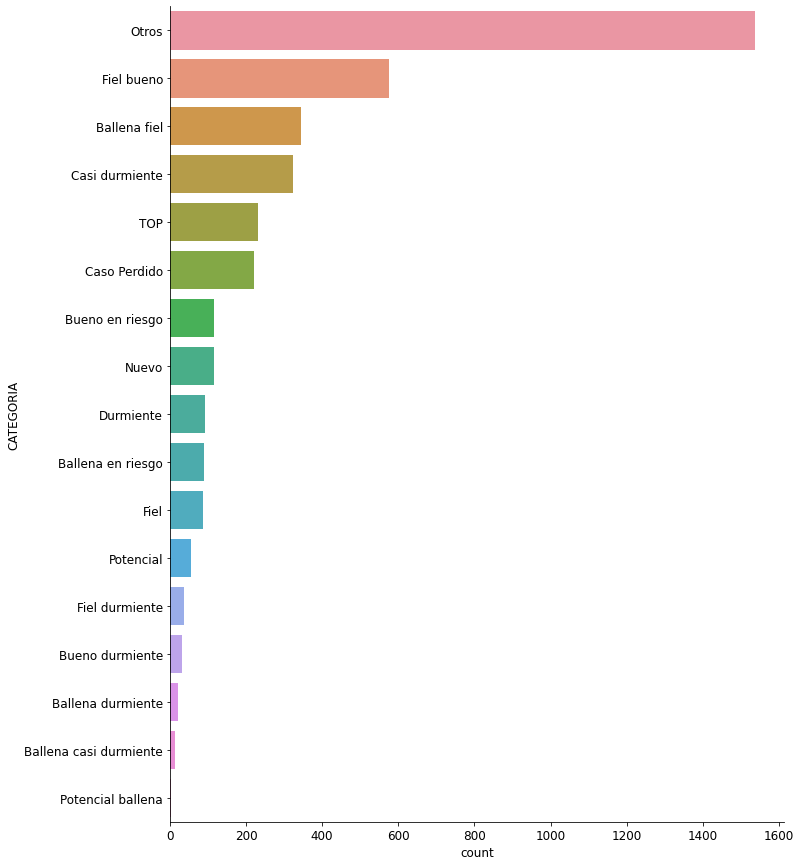

In [19]:
plt.rcParams["figure.figsize"] = (11, 15)
plt.rcParams["font.size"] = 12
sns.countplot(data = df_cliente, y = df_cliente.CATEGORIA, order = df_cliente['CATEGORIA'].value_counts().index)
_ = plt.xticks(rotation = 0)
sns.despine()

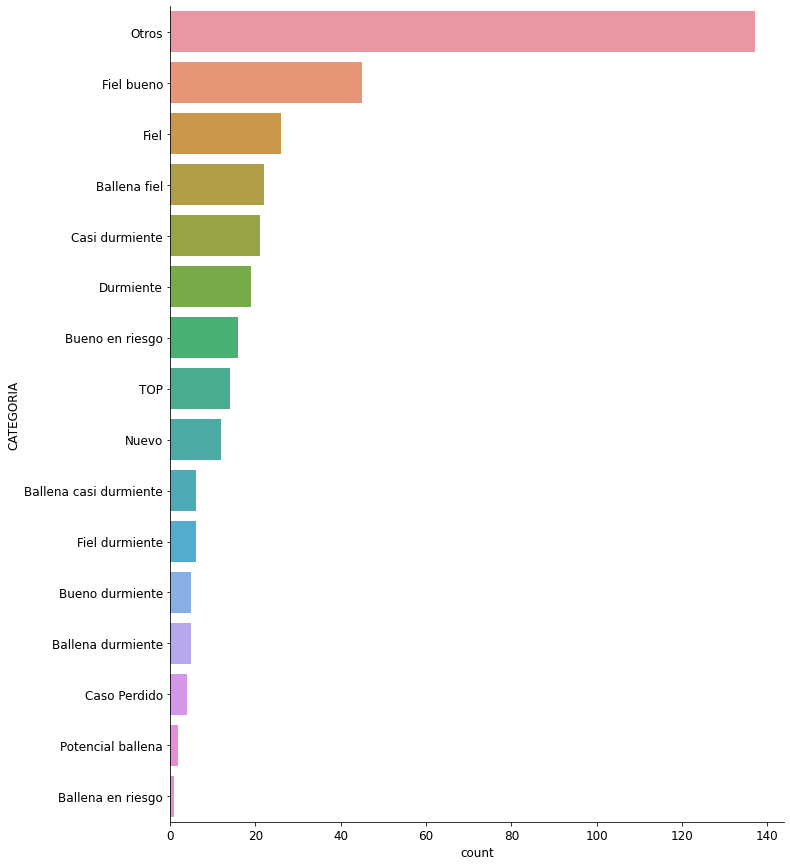

In [20]:
plt.rcParams["figure.figsize"] = (11, 15)
plt.rcParams["font.size"] = 12
sns.countplot(data = df_distribuidor, y = df_distribuidor.CATEGORIA, order = df_distribuidor['CATEGORIA'].value_counts().index)
_ = plt.xticks(rotation = 0)
sns.despine()

In [21]:
df_cliente.loc[df_cliente['CATEGORIA']=='Otros'].shape[0]

1536

4+ de frecuencia + 3- de ImpVenta = Fiel Tacaño
4+ venta + 3- frecuencia = Ocasional


In [22]:
cliente_otros = df_cliente.loc[df_cliente['CATEGORIA']=='Otros']
cliente_otros_agrupado = cliente_otros.groupby(by='RFM')['CATEGORIA'].agg('count')
cliente_otros_agrupado.sort_values(ascending=False)

RFM
122    97
322    82
233    78
121    70
222    66
333    62
234    58
422    57
434    54
433    50
133    50
223    47
123    47
533    44
132    44
334    40
221    38
323    38
321    36
232    35
432    32
131    30
423    30
534    30
523    25
421    24
532    23
231    21
332    21
522    20
134    19
331    18
424    13
535    13
335    13
224    11
124    10
531    10
225    10
431    10
235     9
524     8
324     8
135     7
521     6
435     5
425     5
241     4
325     4
525     2
125     2
Name: CATEGORIA, dtype: int64

In [23]:
cliente_otros.loc[(cliente_otros['QUINTIL_RECENCIA']>3) & (cliente_otros['QUINTIL_IMPVENTA']<=3)]

,CLIENTE_ID,ULTIMA_COMPRA,REFERENCIA,RECENCIA_DIAS,IMPORTE_VENTA,FRECUENCIA,IMPORTE_LOG,QUINTIL_FRECUENCIA,QUINTIL_IMPVENTA,QUINTIL_RECENCIA,RFM,CATEGORIA,Tipo
0,12346,2010-06-28 13:53:00,2010-12-31,185,51.48,28,3.941193,2,1,1,121,Otros,CLIENTE
7,12355,2010-05-21 11:59:00,2010-12-31,223,354.51,22,5.870737,2,3,1,123,Otros,CLIENTE
12,12361,2010-09-03 15:19:00,2010-12-31,118,168.48,19,5.126817,2,2,2,222,Otros,CLIENTE
14,12368,2010-03-21 15:56:00,2010-12-31,284,386.10,18,5.956096,2,3,1,123,Otros,CLIENTE
18,12373,2010-03-25 13:49:00,2010-12-31,280,373.23,37,5.922195,3,3,1,133,Otros,CLIENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,18234,2010-06-06 11:22:00,2010-12-31,207,93.60,30,4.539030,3,1,1,131,Otros,CLIENTE
3862,18252,2010-06-09 12:25:00,2010-12-31,204,448.11,20,6.105039,2,3,1,123,Otros,CLIENTE
3864,18254,2010-05-07 14:37:00,2010-12-31,237,219.96,16,5.393446,2,2,1,122,Otros,CLIENTE
3871,18264,2010-07-29 10:02:00,2010-12-31,154,281.97,36,5.641801,3,2,2,232,Otros,CLIENTE


In [24]:
df_cliente['CATEGORIA'] = np.where((df_cliente['QUINTIL_FRECUENCIA']>=4) & (df_cliente['QUINTIL_IMPVENTA']<=3) & (df_cliente['CATEGORIA']=='Otros'),'TACAÑO',df_cliente.CATEGORIA)
df_cliente['CATEGORIA'] = np.where((df_cliente['QUINTIL_FRECUENCIA']<3) & (df_cliente['QUINTIL_IMPVENTA']>3) & (df_cliente['CATEGORIA']=='Otros'),'OCASIONAL',df_cliente.CATEGORIA)
df_cliente['CATEGORIA'] = np.where((df_cliente['QUINTIL_RECENCIA']>3) & (df_cliente['QUINTIL_FRECUENCIA']<=3) & (df_cliente['CATEGORIA']=='Otros'),'RECIENTE A FIDELIZAR',df_cliente.CATEGORIA)
df_cliente.CATEGORIA.value_counts()

Otros                     743
RECIENTE A FIDELIZAR      716
Fiel bueno                576
Ballena fiel              344
Casi durmiente            324
TOP                       231
Caso Perdido              220
Bueno en riesgo           117
Nuevo                     115
Durmiente                  93
Ballena en riesgo          90
Fiel                       87
OCASIONAL                  73
Potencial                  54
Fiel durmiente             37
Bueno durmiente            31
Ballena durmiente          20
Ballena casi durmiente     13
Potencial ballena           4
TACAÑO                      4
Name: CATEGORIA, dtype: int64

In [25]:
df_distribuidor['CATEGORIA'] = np.where((df_distribuidor['QUINTIL_FRECUENCIA']>=4) & (df_distribuidor['QUINTIL_IMPVENTA']<=3) & (df_distribuidor['CATEGORIA']=='Otros'),'TACAÑO',df_distribuidor.CATEGORIA)
df_distribuidor['CATEGORIA'] = np.where((df_distribuidor['QUINTIL_FRECUENCIA']<3) & (df_distribuidor['QUINTIL_IMPVENTA']>3) & (df_distribuidor['CATEGORIA']=='Otros'),'OCASIONAL',df_distribuidor.CATEGORIA)
df_distribuidor['CATEGORIA'] = np.where((df_distribuidor['QUINTIL_RECENCIA']>3) & (df_distribuidor['QUINTIL_FRECUENCIA']<=3) & (df_distribuidor['CATEGORIA']=='Otros'),'RECIENTE A FIDELIZAR',df_distribuidor.CATEGORIA)
df_distribuidor.CATEGORIA.value_counts()

Otros                     63
RECIENTE A FIDELIZAR      53
Fiel bueno                45
Fiel                      26
Ballena fiel              22
Casi durmiente            21
OCASIONAL                 20
Durmiente                 19
Bueno en riesgo           16
TOP                       14
Nuevo                     12
Fiel durmiente             6
Ballena casi durmiente     6
Ballena durmiente          5
Bueno durmiente            5
Caso Perdido               4
Potencial ballena          2
Ballena en riesgo          1
TACAÑO                     1
Name: CATEGORIA, dtype: int64

In [26]:
df_cliente_agrupado = df_cliente.groupby(by='CATEGORIA')[['IMPORTE_VENTA','RECENCIA_DIAS','FRECUENCIA']].agg('mean')
df_cliente_agrupado

,IMPORTE_VENTA,RECENCIA_DIAS,FRECUENCIA
CATEGORIA,,,
Ballena casi durmiente,1772.460000,112.692308,7.846154
Ballena durmiente,1509.592500,228.900000,64.250000
Ballena en riesgo,1796.613000,118.833333,134.166667
Ballena fiel,1757.244767,49.395349,154.122093
Bueno durmiente,951.851613,231.870968,119.903226
Bueno en riesgo,622.030000,120.521368,98.025641
Casi durmiente,161.972778,105.944444,7.657407
Caso Perdido,59.978455,269.313636,6.518182
Durmiente,327.436452,268.462366,8.150538


In [27]:
df_distribuidor_agrupado = df_distribuidor.groupby(by='CATEGORIA')[['IMPORTE_VENTA','RECENCIA_DIAS','FRECUENCIA']].agg('mean')
df_distribuidor_agrupado

,IMPORTE_VENTA,RECENCIA_DIAS,FRECUENCIA
CATEGORIA,,,
Ballena casi durmiente,28265.445000,28.666667,77.500000
Ballena durmiente,95270.292000,160.800000,39.800000
Ballena en riesgo,13521.690000,30.000000,388.000000
Ballena fiel,33452.852727,18.590909,842.772727
Bueno durmiente,8029.710000,74.800000,943.600000
Bueno en riesgo,5195.238750,40.375000,446.125000
Casi durmiente,5226.891429,35.095238,52.809524
Caso Perdido,3129.750000,155.500000,78.000000
Durmiente,5161.362632,112.157895,35.263158


In [28]:
df = df_cliente.append(df_distribuidor)
df_ag = df.groupby(by=['CATEGORIA','Tipo'])[['IMPORTE_VENTA','RECENCIA_DIAS','FRECUENCIA']].agg('mean')
df_ag

IMPORTE_VENTA  RECENCIA_DIAS   FRECUENCIA
CATEGORIA              Tipo                                                   
Ballena casi durmiente CLIENTE         1772.460000     112.692308     7.846154
                       DISTRIBUIDOR   28265.445000      28.666667    77.500000
Ballena durmiente      CLIENTE         1509.592500     228.900000    64.250000
                       DISTRIBUIDOR   95270.292000     160.800000    39.800000
Ballena en riesgo      CLIENTE         1796.613000     118.833333   134.166667
                       DISTRIBUIDOR   13521.690000      30.000000   388.000000
Ballena fiel           CLIENTE         1757.244767      49.395349   154.122093
                       DISTRIBUIDOR   33452.852727      18.590909   842.772727
Bueno durmiente        CLIENTE          951.851613     231.870968   119.903226
                       DISTRIBUIDOR    8029.710000      74.800000   943.600000
Bueno en riesgo        CLIENTE          622.030000     120.521368    98.025641
                       DISTRIBUIDOR    5195.238750      40.375000   446.125000
Casi durmiente         CLIENTE          161.972778     105.944444     7.657407
                       DISTRIBUIDOR    5226.891429      35.095238    52.809524
Caso Perdido           CLIENTE           59.978455     269.313636     6.518182
                       DISTRIBUIDOR    3129.750000     155.500000    78.000000
Durmiente              CLIENTE          327.436452     268.462366     8.150538
                       DISTRIBUIDOR    5161.362632     112.157895    35.263158
Fiel                   CLIENTE          215.602759      45.218391    82.954023
                       DISTRIBUIDOR    3514.635000      16.423077   549.884615
Fiel bueno             CLIENTE          703.143594      42.513889   119.746528
                       DISTRIBUIDOR    6086.496000      16.933333   561.533333
Fiel durmiente         CLIENTE          337.497568     261.864865    85.864865
                       DISTRIBUIDOR    3902.340000      75.666667   529.000000
Nuevo                  CLIENTE          246.605478      30.660870     8.547826
                       DISTRIBUIDOR    5357.137500      14.583333    52.666667
OCASIONAL              CLIENTE         1033.142055     105.328767    22.986301
                       DISTRIBUIDOR   21467.862000      42.850000   162.200000
Otros                  CLIENTE          408.254415      49.606999    33.176312
                       DISTRIBUIDOR    4556.890000      18.031746   224.555556
Potencial              CLIENTE           76.765000      44.037037     7.518519
Potencial ballena      CLIENTE         1833.390000      28.000000     8.750000
                       DISTRIBUIDOR   23835.240000      11.500000    75.000000
RECIENTE A FIDELIZAR   CLIENTE          335.075908     193.439944    30.668994
                       DISTRIBUIDOR    4500.261509      63.320755   208.245283
TACAÑO                 CLIENTE          119.925000     127.000000    61.750000
                       DISTRIBUIDOR    3288.870000      32.000000   417.000000
TOP                    CLIENTE         1862.923636      20.060606   227.714286
                       DISTRIBUIDOR   45477.064286      10.071429  2065.714286